In [53]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.text_cell_render.rendered_html{font-size:14pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch12. 데이터 시각화(Pandas)</font></b>

In [54]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 저장시 해상도 높게

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 한글 기본 설정(windows mac)

plt.rc('font',family='Malgun Gothic') # 윈도우즈
#plt.rc('font',family='AppleGothic') # mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning 안보이게

import warnings
warnings.filterwarnings(action = 'ignore') # warning 안 보이게


# 2절 seaborn
- metplotlib를 기반으로 만든 고수준 그래픽 라이브어리
     - 공식 사이트 : https://seaborn.pydata.org/
     - 그래프 api : https://seaborn.pydata.org/api.html
- Seaborn으로 그래프 그리기 위한 단계
      1) 데이터 준비<br>
      2) 미적속성 설정<br>
      3) 함수를 이용해서 그래프 그리기(관계형 = 수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)
      4) 그래프 출력(show), 저장(savefig)
     
     
     
     

## 2.1 데이터 준비하기
- iris, titanic

In [55]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,setosa


In [85]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
18,5.7,3.8,1.7,0.3,setosa


In [56]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [57]:
iris.info() #dtype, 전체행수, 결측치를 제외한 데이터 수, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [1]:
titanic = sns.load_dataset('titanic')
titanic.head()
# pclass : 티겟class
# sibsp: 동승한 형제나 배우자 / parch : 동승한부모/자식수/ embarked: 탑승지
# deck : 데크

NameError: name 'sns' is not defined

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2.2 미적 속성 설정하기(style, context, pallette, figsize,...)
### 1) 그래프 스타일 지정
- white, whitegrid, darkgrid, dark, ticks
### 2) 컨텍스트 지정(배율)
- notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)
### 3) 컬러팔레트
- https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap) 21, 54p
-https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
-https://matplotlib.org/tutorials/colors/colormaps.html
-https://seaborn.pydata.org/tutorial/color_palettes.html

TypeError: `obj` must be a seaborn Grid or matplotlib Axes or Figure instance.

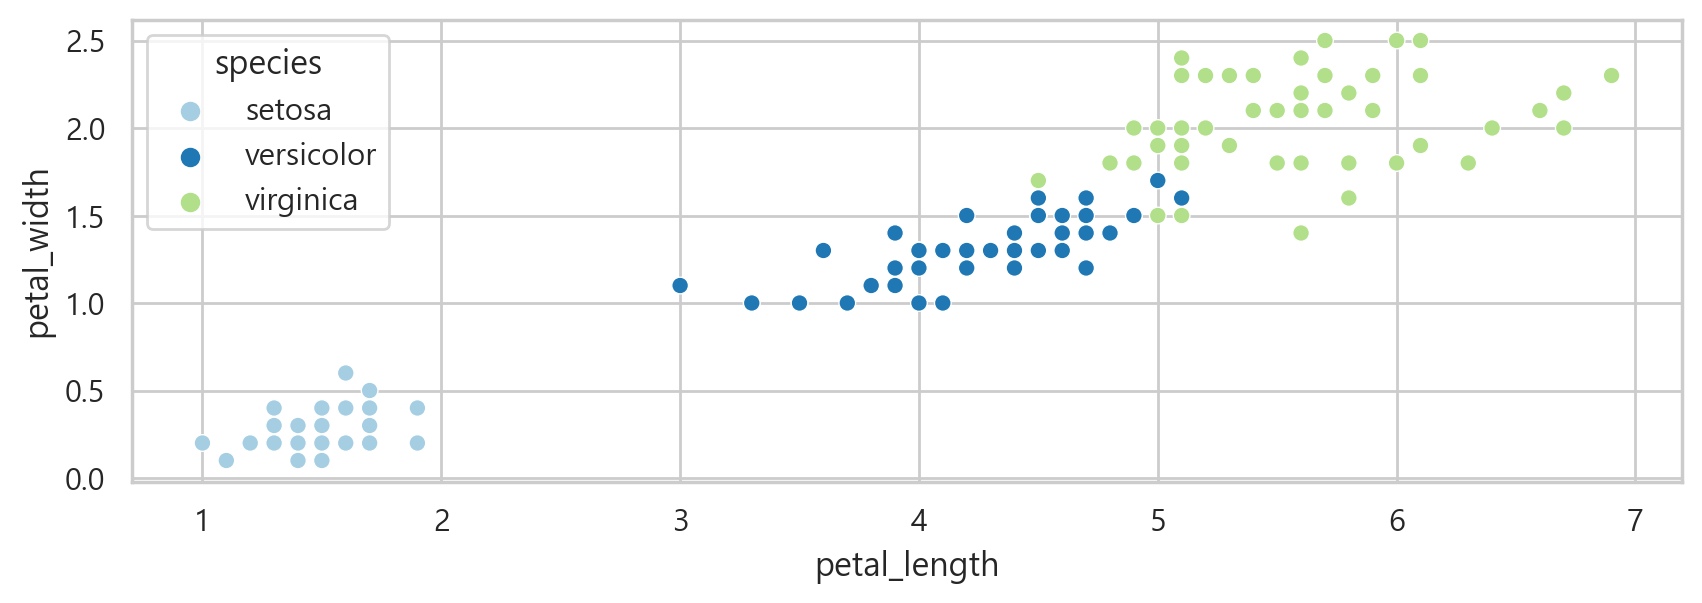

In [60]:
plt.figure(figsize=(10,3))
# 기본 미적 속성 설정
sns.set(style='whitegrid',
        context='notebook',
       palette='Paired',
       rc={'figure.figsize':(10,3)})
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지



sns.scatterplot(data=iris, x = 'petal_length', y='petal_width', hue='species')
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
ax.set(title='상관관계가 높은 두 변수',
      ylabel='꽃잎너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
ax.set_xticks([1,3,5,7])
plt.show()

In [ ]:
# 기본 미적 속성 설정
sns.set(style='whitegrid', 
        context='notebook',
        palette='Set2',
        rc={'figure.figsize':(10,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지


## 2.3 seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
- scatterplot, lineplot, relplot(서브 플롯 제공) : x가 수치형

In [ ]:
# 종별 다른 색상과 다른 스타일로 scatter
sns.scatterplot(data=iris, x='petal_length', y='petal_width',
                style='species', palette = 'Set1')
plt.show()

In [ ]:
# 종별 다른 색상과 다른 스타일로 Lineplot
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue = 'species',
                kind = 'line',
                col = 'species',
                col_wrap=2, #한줄에 표현될 서브플롯 수)
plt.show()

In [ ]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x = 'petal_length', y = 'petal_width',hue='species',
            kind='line', # 서브플롯으로 그려질 그래프 종류(기본값:scatter)
            col='species', # col단위로 서브플롯 표현)
            #col_wrap = 2,  # 한줄에 표현될 서브플롯 수
            # facet_kws = {'sharey':False} # 축공유
           )
plt.show()

In [ ]:
# 종별 scatterplot을 서브플롯으로
g = sns.relplot(data=iris, x = 'petal_length', y = 'petal_width',hue='species',
            kind='scatter', # 서브플롯으로 그려질 그래프 종류(기본값:scatter)
            col='species', # col단위로 서브플롯 표현)
            #col_wrap = 2,  # 한줄에 표현될 서브플롯 수
            # facet_kws = {'sharey':False} # 축공유
           )
# 크기 조정
g.fig.set_size_inches(10,3)
plt.show()

In [ ]:
# as[0]에는 scatter, as[10]에는 line
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=iris, x = 'petal_length', y ='petal_width', hue ='species', ax = ax[0])
sns.lineplot(data=iris, x = 'petal_length', y ='petal_width', hue ='species', ax = ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot(무작위로 흩뿌림), swarmplot(겹치지않음) - 점도표
- barplot, barhplot, pointplot(막대대신 marker가 있는 선
- countplot(bar는 y의 평균값이 높이, count는 x의 빈도수 높이)
- boxplot, violinplot, boxenplot     => catplot(서브플롯)




In [ ]:
# x축이 범주형일떄의 산점도
sns.stripplot(data=iris, x = 'species', y = 'petal_width', hue='species',
             palette='hsv')

In [ ]:
# x축이 범주형일떄의 산점도(중첩되지 않게)
sns.swarmplot(data=iris, x = 'species', y = 'petal_width', hue='species', palette='Set1')

plt.show()

In [ ]:
# 내림차순으로 정렬된 iris 범주형 산점도
sns.swarmplot(data = iris.sort_values('petal_width', ascending=False),
             x = 'species', y = 'petal_width', hue='species'm palette='Set1')

plt.show()

In [ ]:
# x축의 순서를 임의로 정할 수 있음
sns.swarmplot(data = iris,
             x = 'species', y = 'petal_width', hue='species', palette='Set1',
             order=['versicolor','setosa','virginica'])

plt.show()

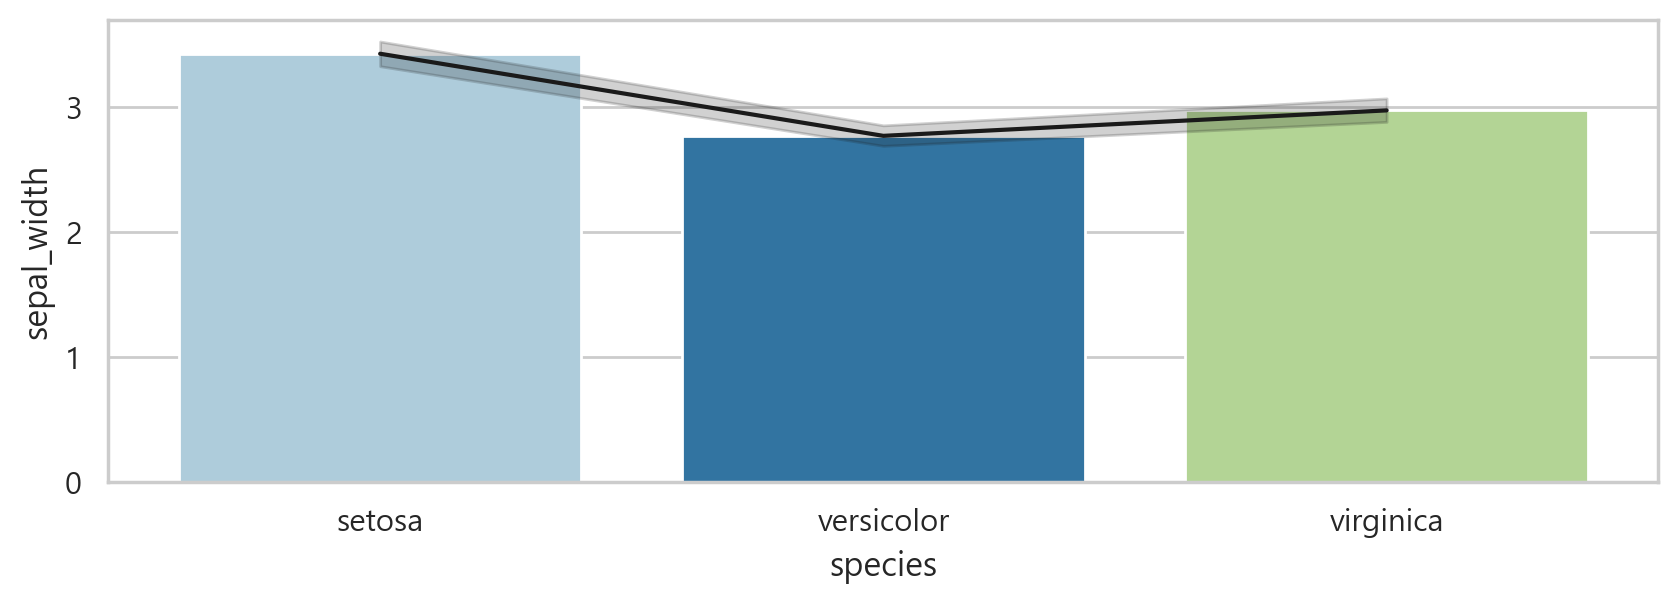

In [61]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간(신뢰구간제외:errorbar=None)

sns.barplot(data=iris, x = 'species',y = 'sepal_width',
           errorbar=None)
sns.lineplot(data=iris, x='species',y='sepal_width',color='k')

plt.show()

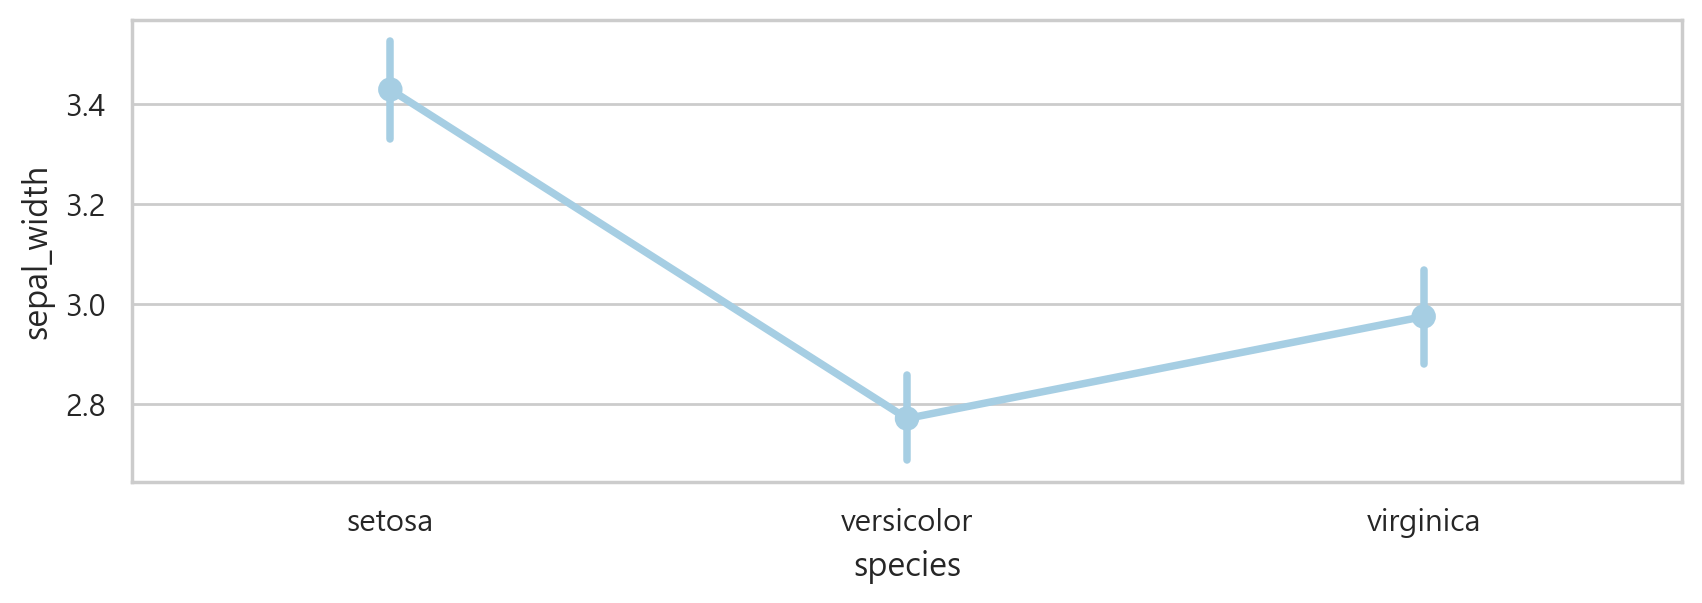

In [63]:
sns.pointplot(data=iris, x = 'species',y = 'sepal_width')
plt.show()

In [64]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


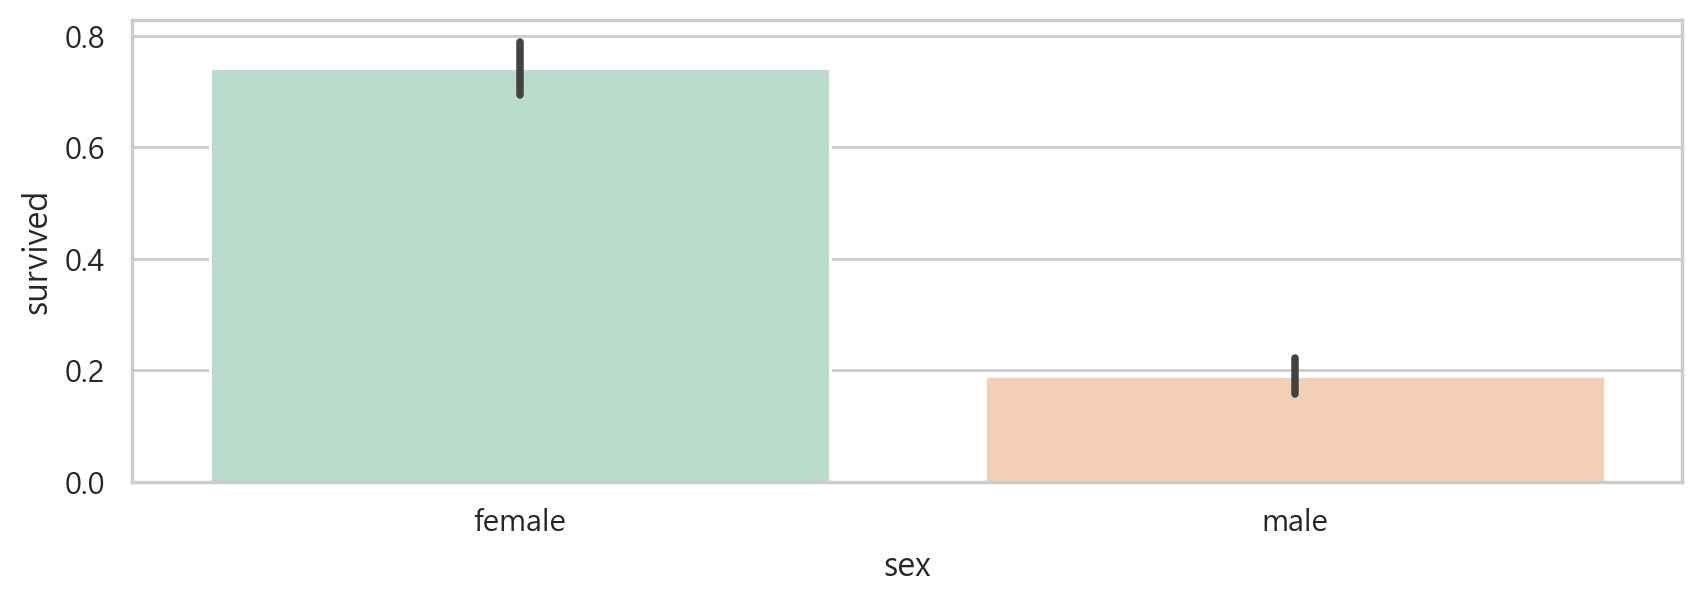

In [68]:
3# 성별 평균 생존율을 막대그래프
sns.barplot(data=titanic, x ='sex', y='survived',
            order=['female','male'],
            palette='Pastel2')
plt.show()

In [70]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
# 남여 데이터 수
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [ ]:
# 남여 데이터 수 (정렬)
titanic['sex'].value_counts()

<Axes: xlabel='sex', ylabel='survived'>

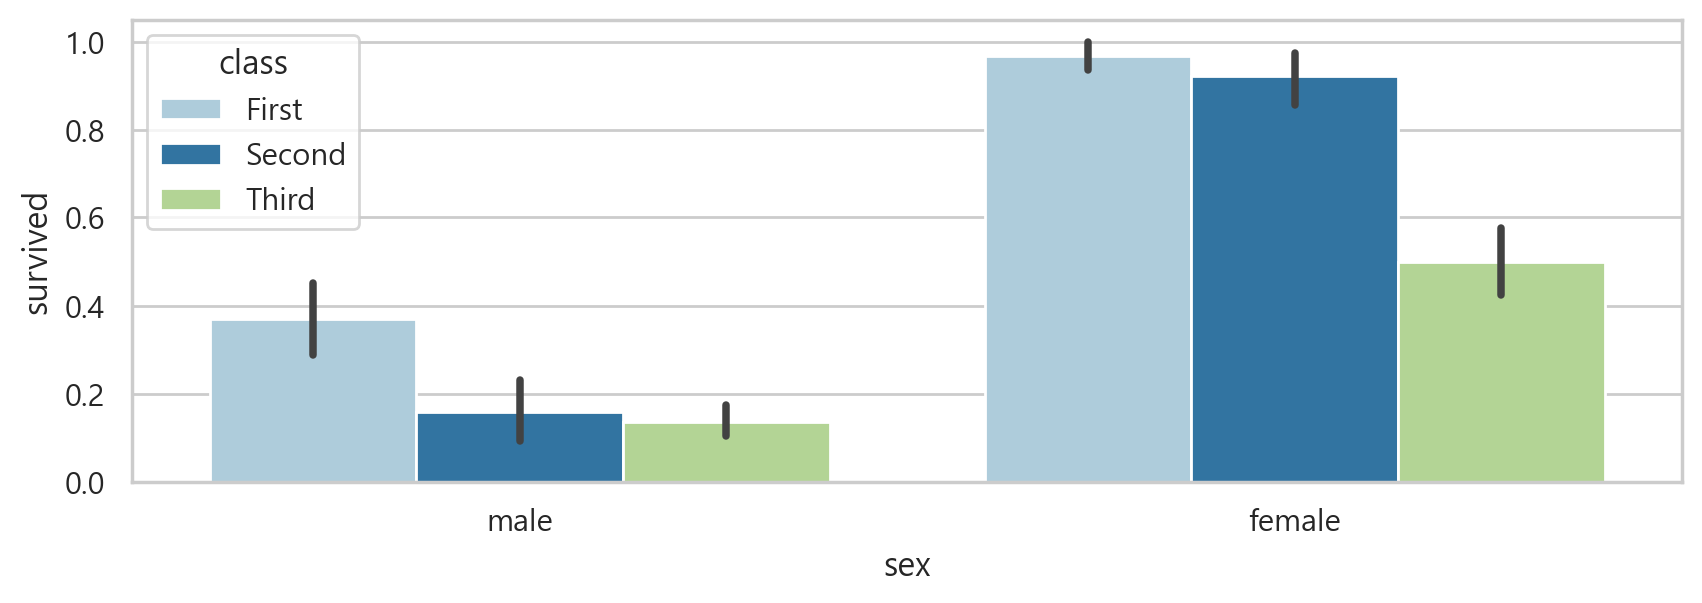

In [74]:
# class별 생존률
sns.barplot(data= titanic, x ='sex', y ='survived', hue = 'class')

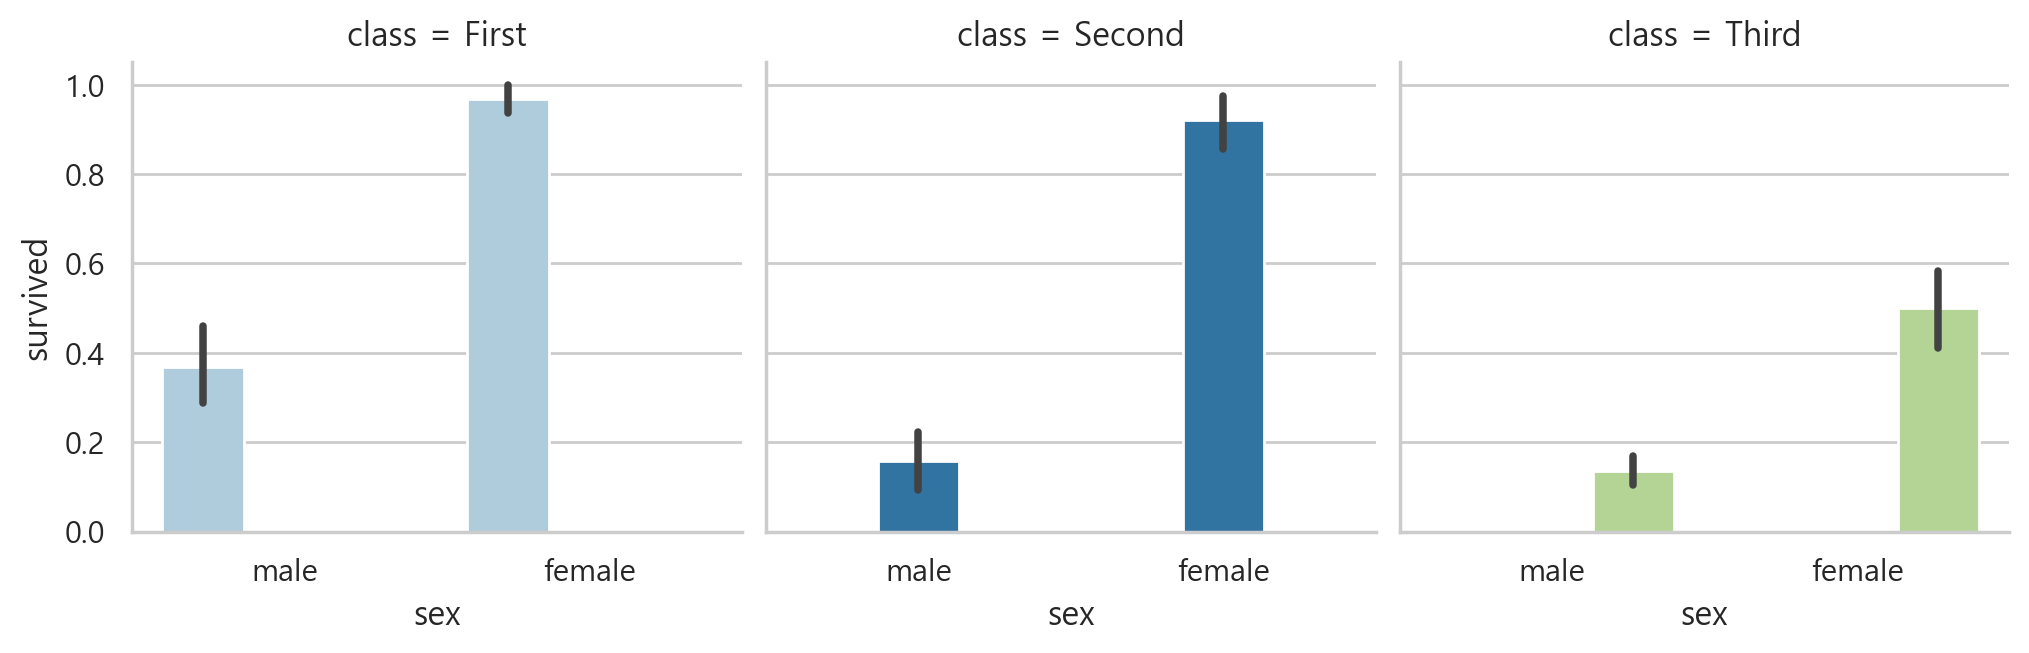

In [78]:
# class 별 생별 생존률 서브플롯
g = sns.catplot(data = titanic,
               x = 'sex',
               y = 'survived',
               hue='class',
               kind='bar', # 기본값은 strip
               col = 'class',
               facet_kws={'sharex': False})
g.fig.set_size_inches(10,3)

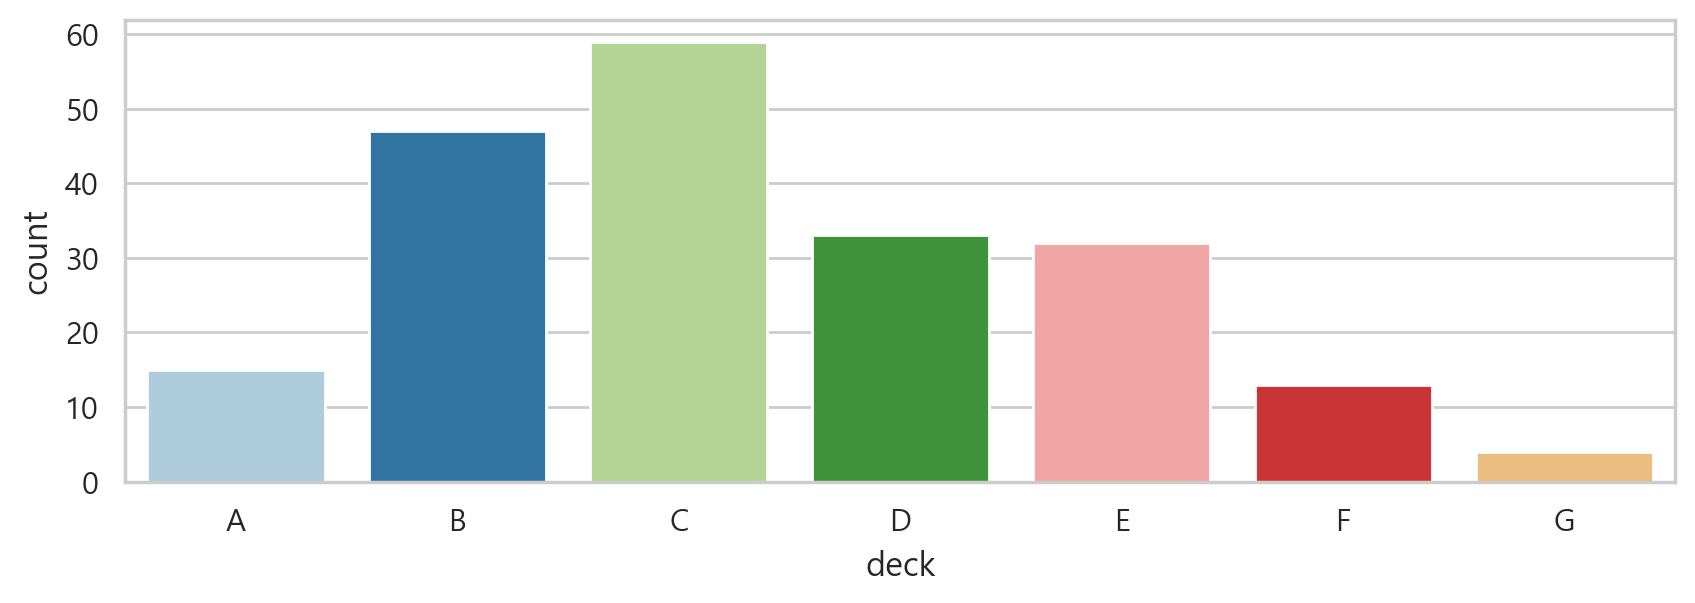

In [79]:
# deck별 데이터수를 막대그래프로(countoplot)
sns.countplot(data=titanic, x = 'deck')
plt.show()

In [80]:
# deck별 갯수
titanic['deck'].value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
# deck별 데이터수를 막대그래프로(countplot)
sns.countplot(data=titanic, x = 'deck', order = titanic)

In [ ]:
# boxplot
sns.boxplot(data= titanic, x ='sex', y = 'age')
plt.show()


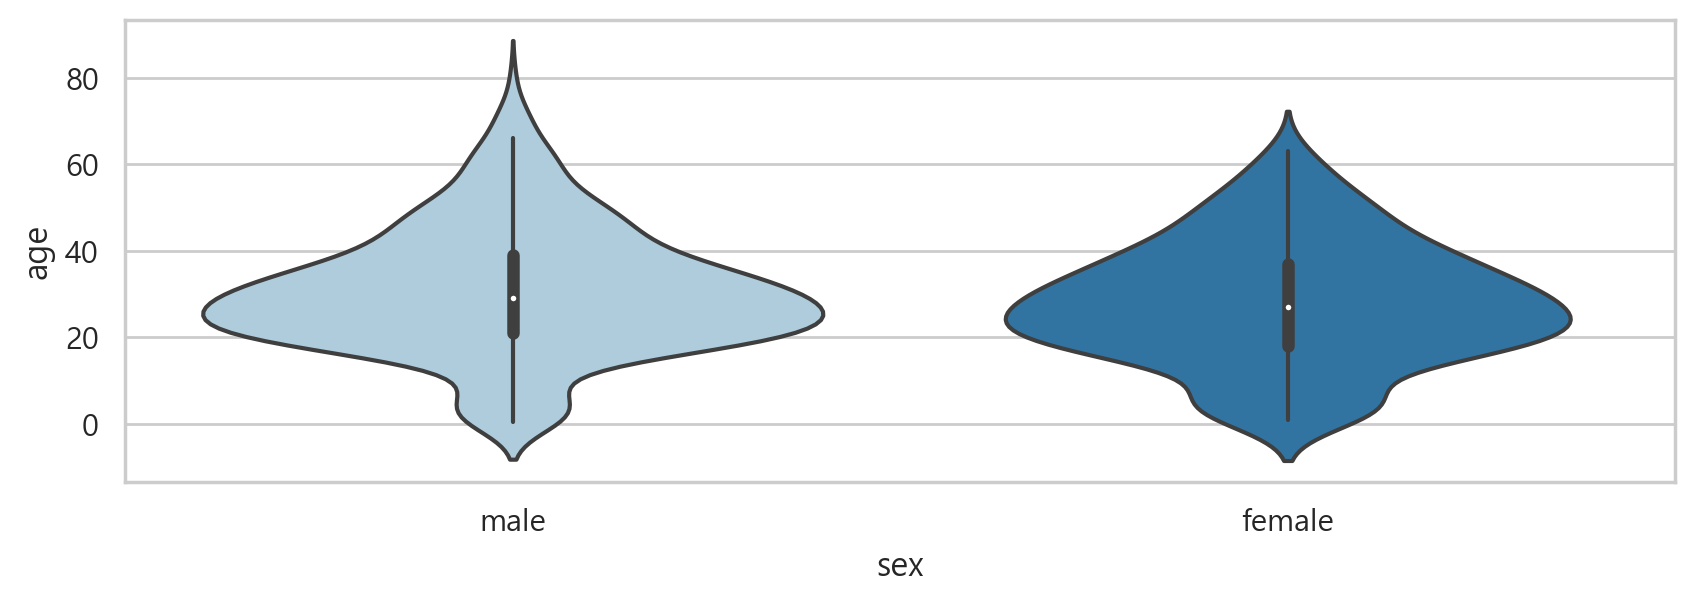

In [83]:
sns.violinplot(data=titanic, x = 'sex', y = 'age')
plt.show()

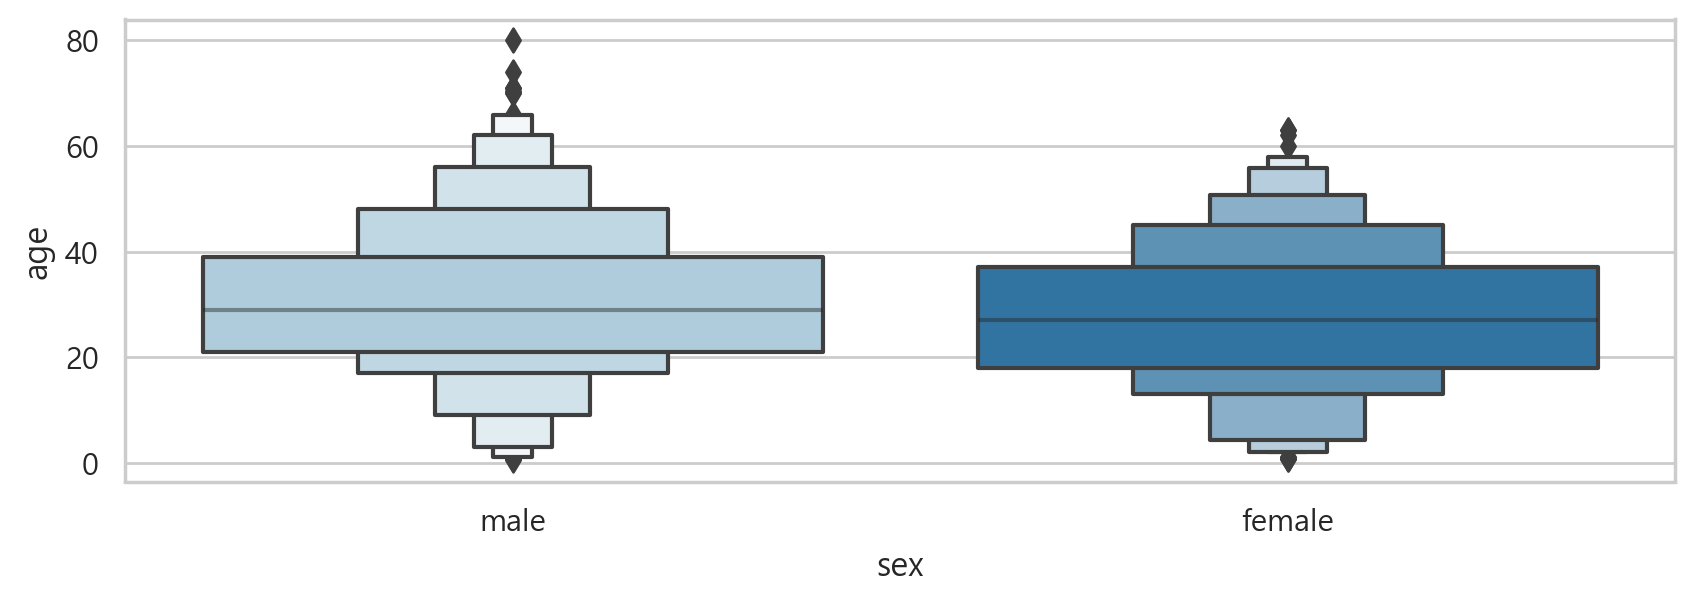

In [84]:
sns.boxenplot(data=titanic, x = 'sex', y = 'age')
plt.show()


## 3) 쌍관계 그래프
- pairplot : 모든 수치형 변수 쌍에 대해 산좀도와 히스토그램을 보여줌





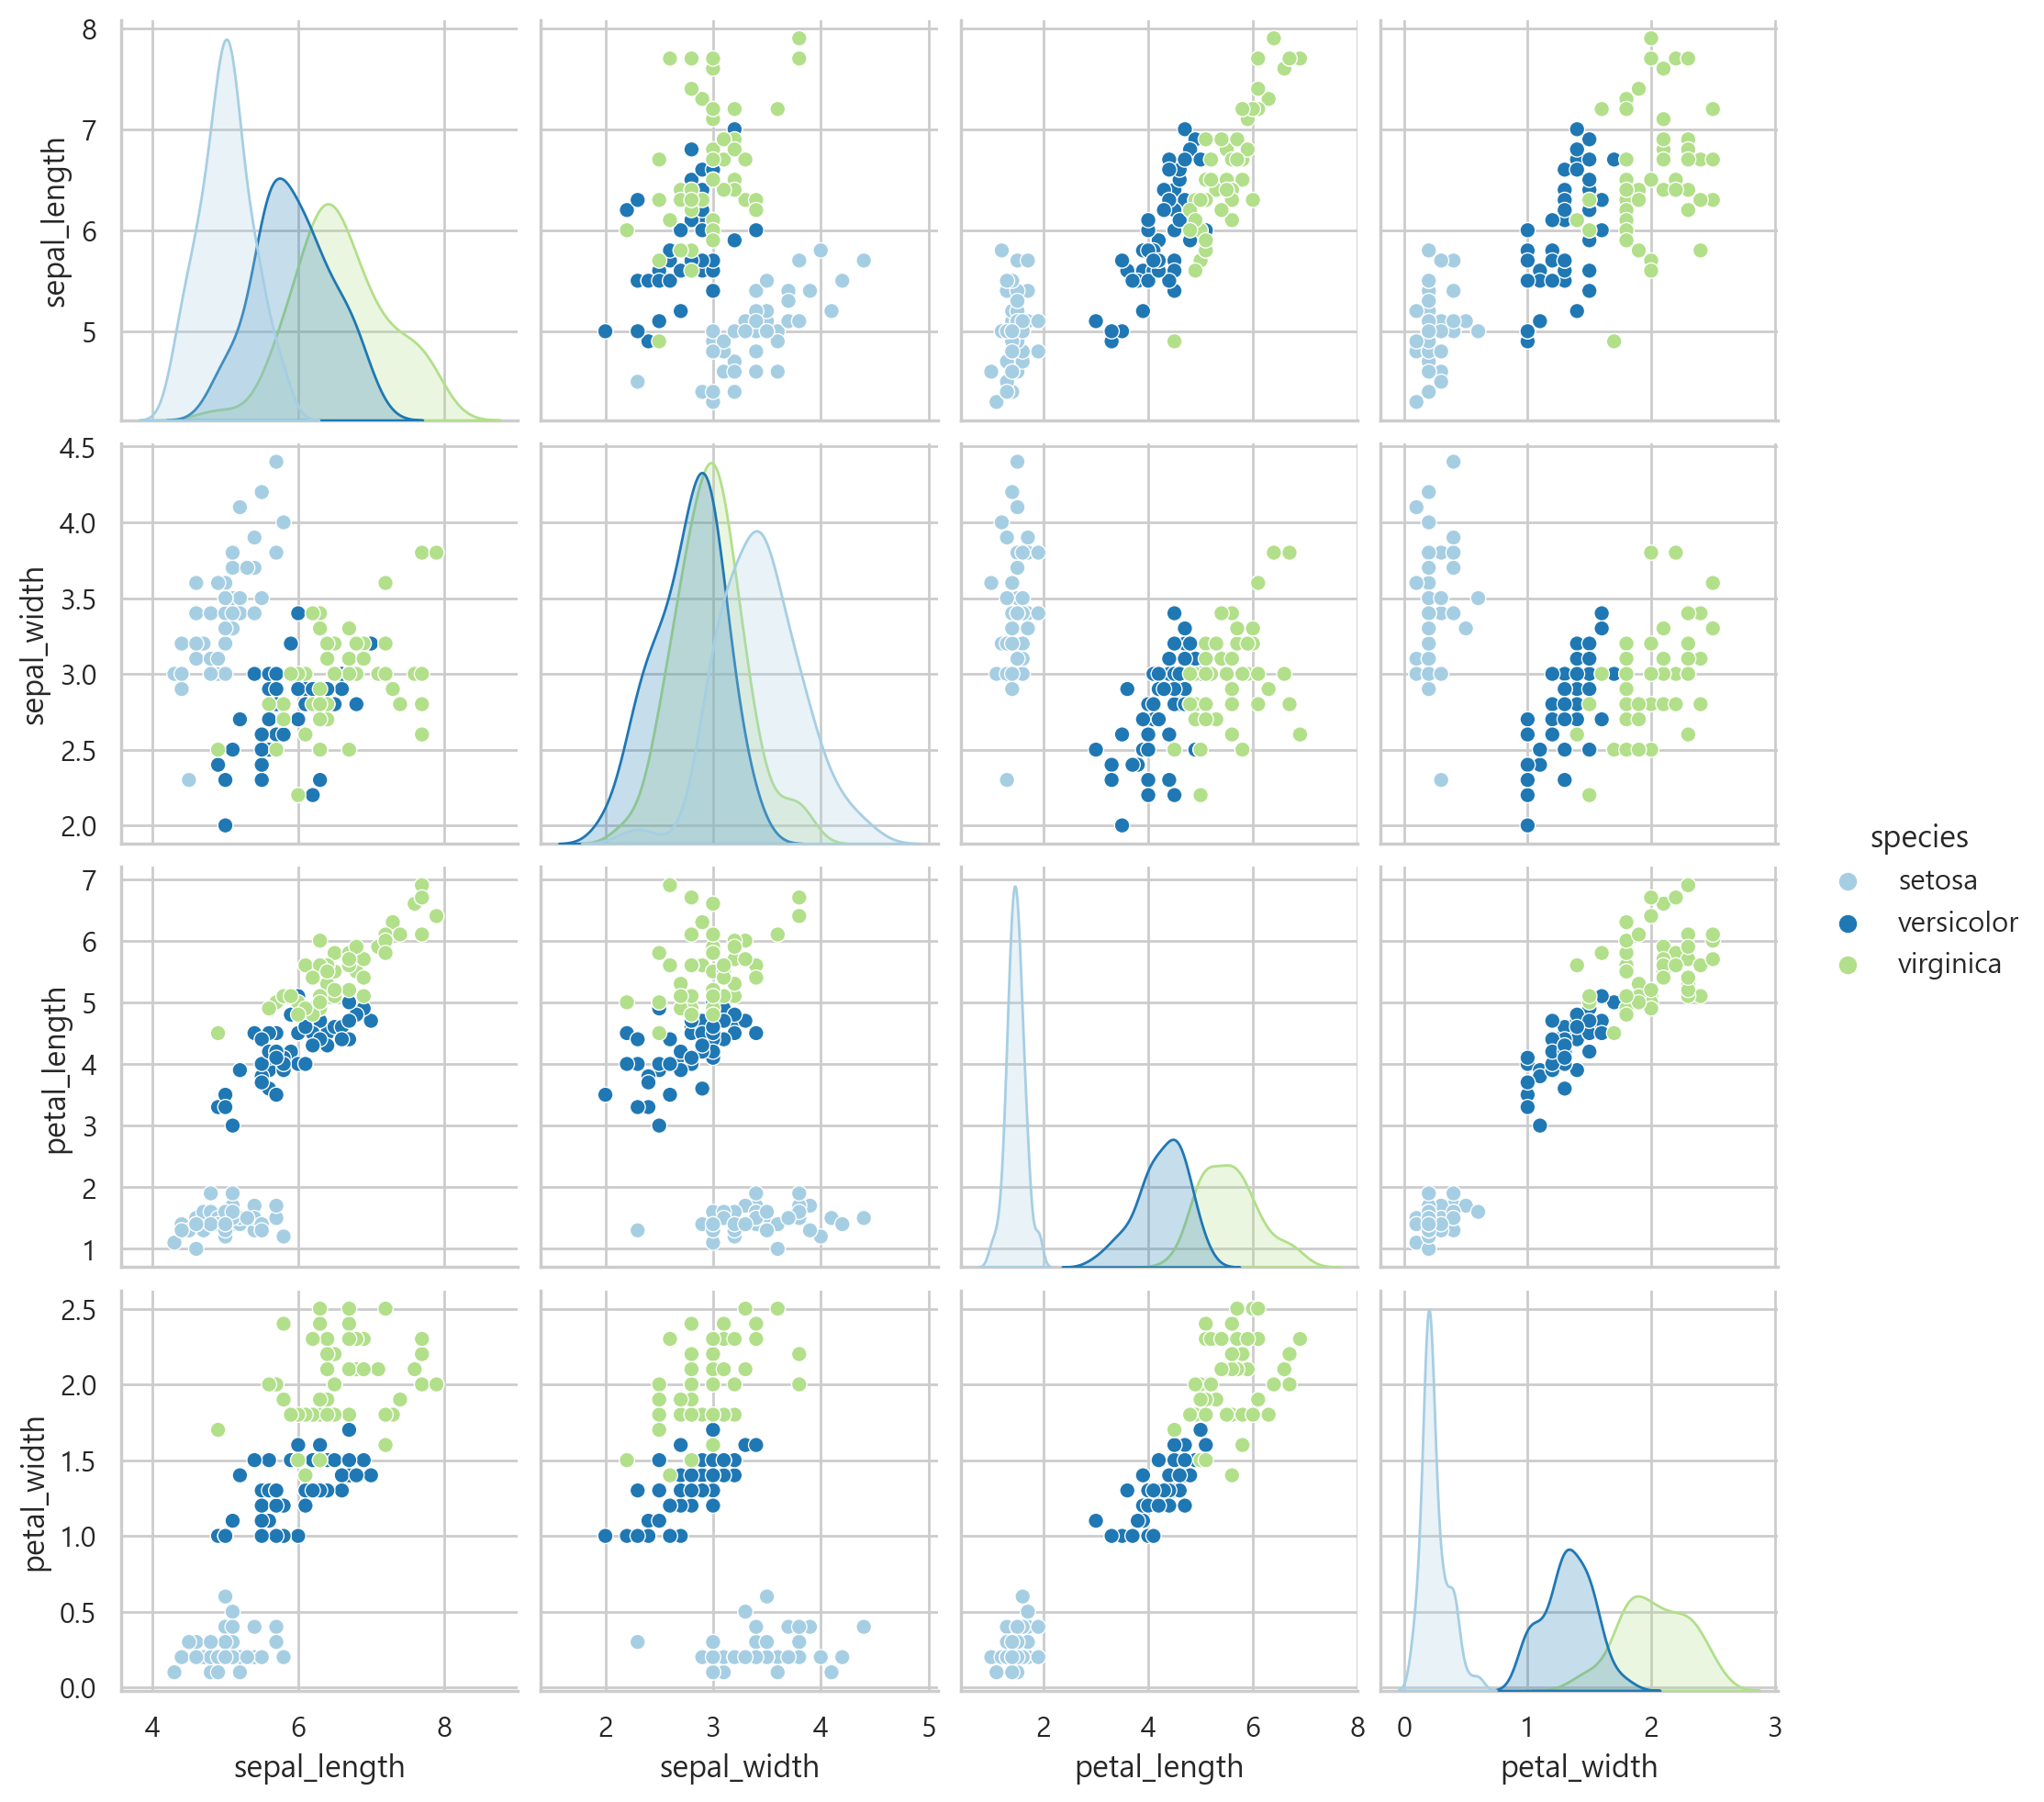

In [87]:
sns.pairplot(data=iris, hue='species')
plt. show()

## 밀도그래프

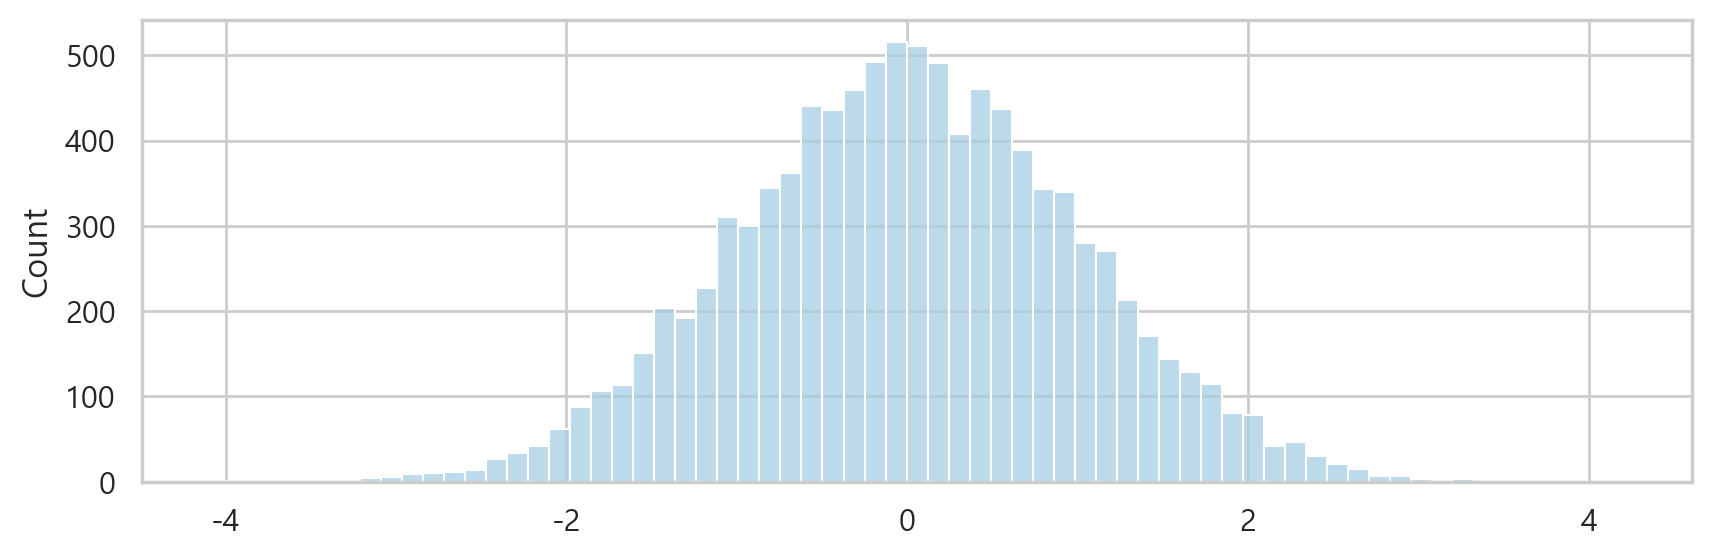

In [90]:
import numpy as np
x = np.random.randn(10000) # 평균0, 표준편차1인 정규분포를 이루는 10000개 데이터
sns.histplot(x, kde=False) # kde = False분포를 매끄럽게
plt.show()

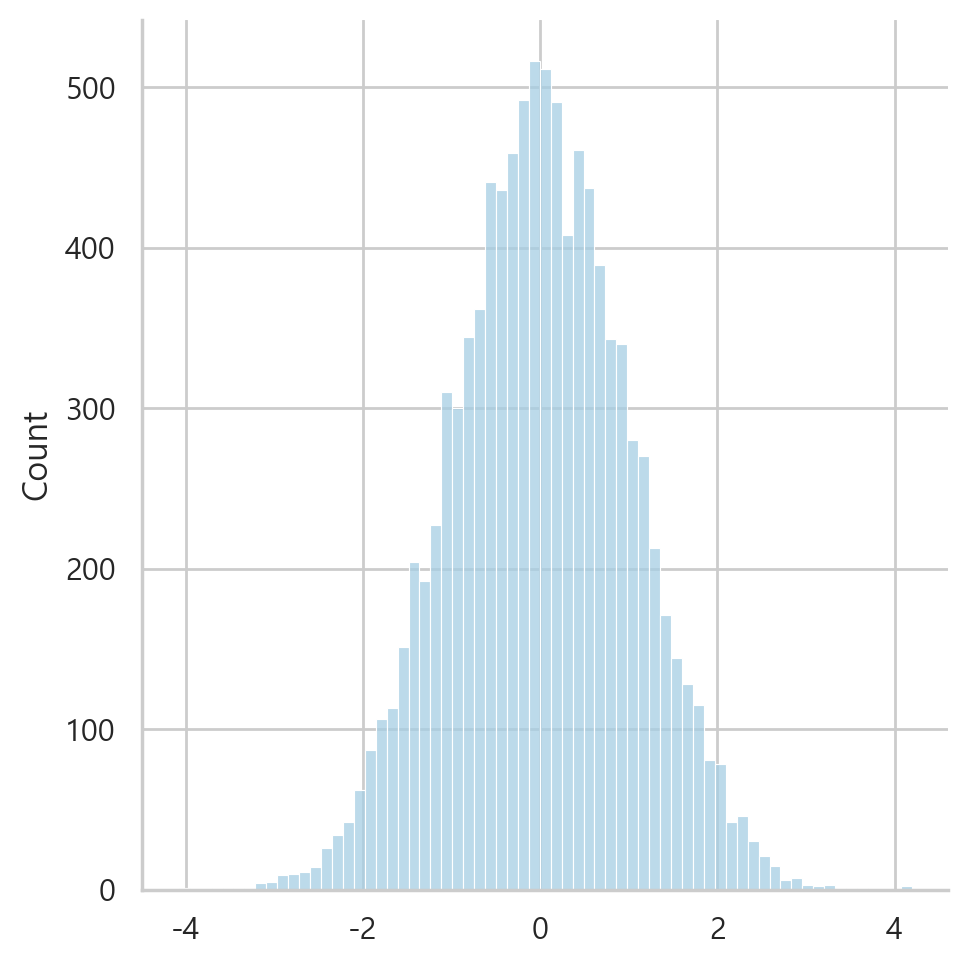

In [91]:
sns.displot(x)
plt.show()

### 5) 회귀 그래프

In [92]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


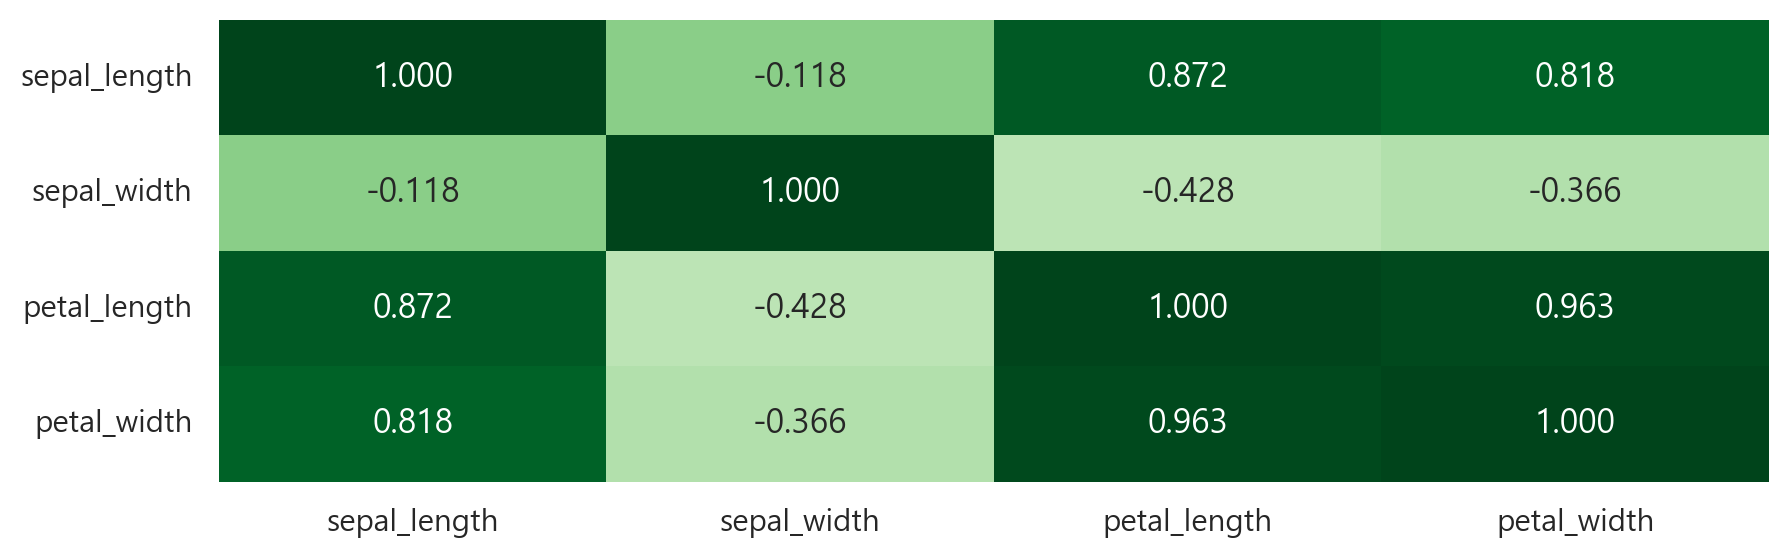

In [96]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f',cmap='Greens', cbar=False)
plt.show()

In [100]:
np.ones_like(corr,dtype = bool) # corr과  구조가 같은 1로 채워진 배열

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

<Axes: >

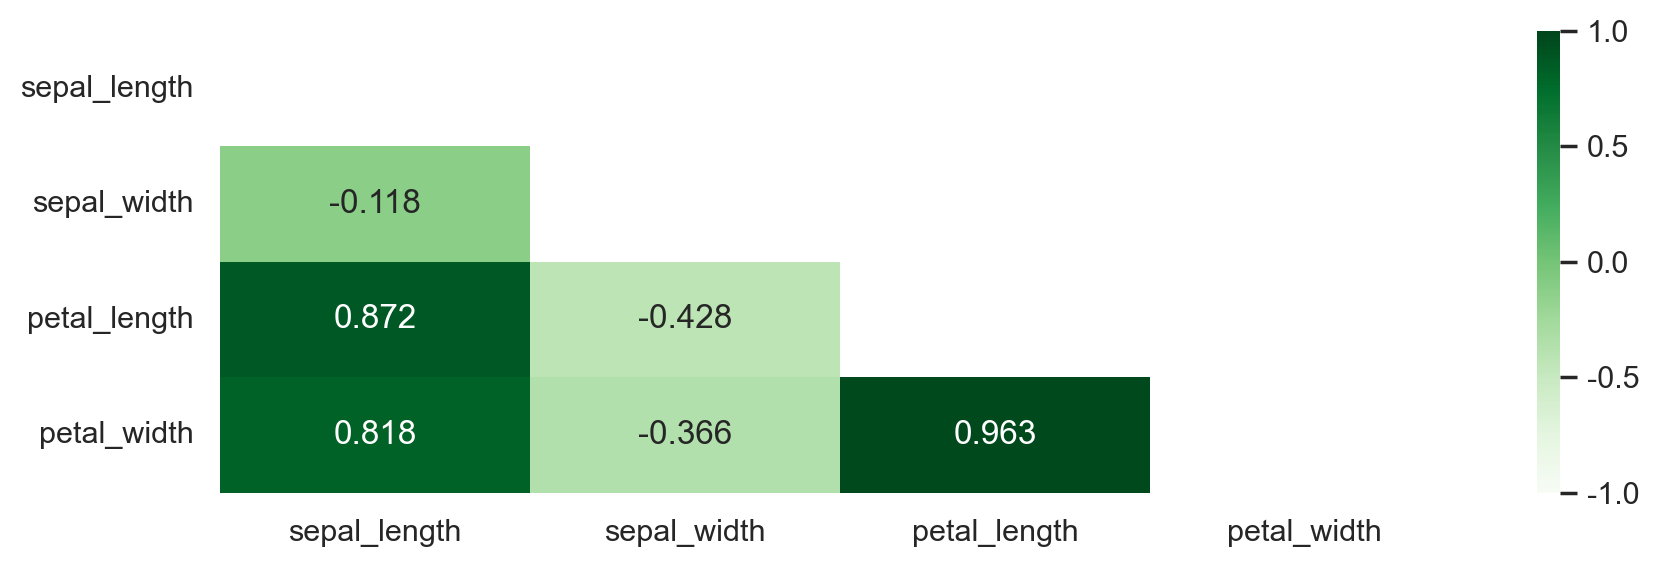

In [107]:
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,vmin=-1, vmax=1, annot=True, fmt='.3f',cmap='Greens',mask=mask)

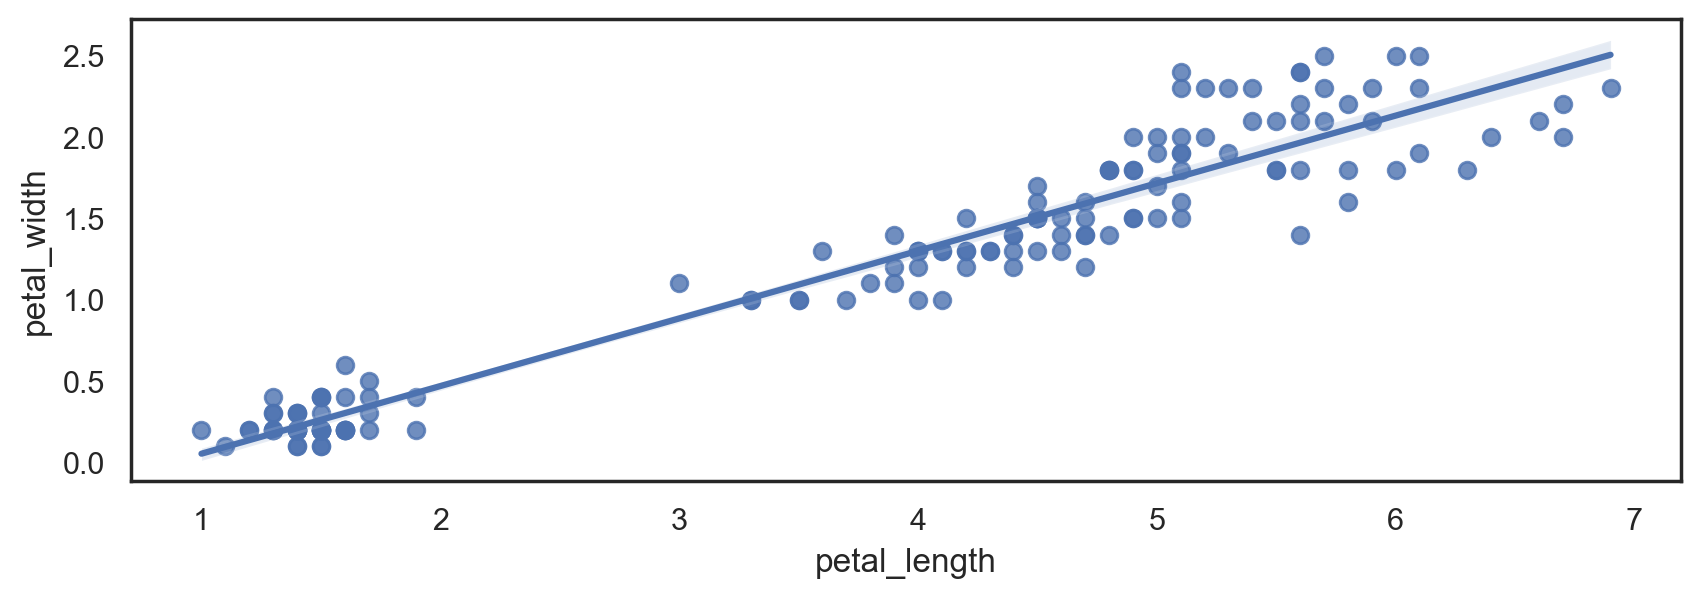

In [108]:
# 회귀그래프 : regplot(hue사용불가), LmpLot(hue사용가능)
sns.regplot(data=iris, x = 'petal_length', y = 'petal_width')
plt.show()

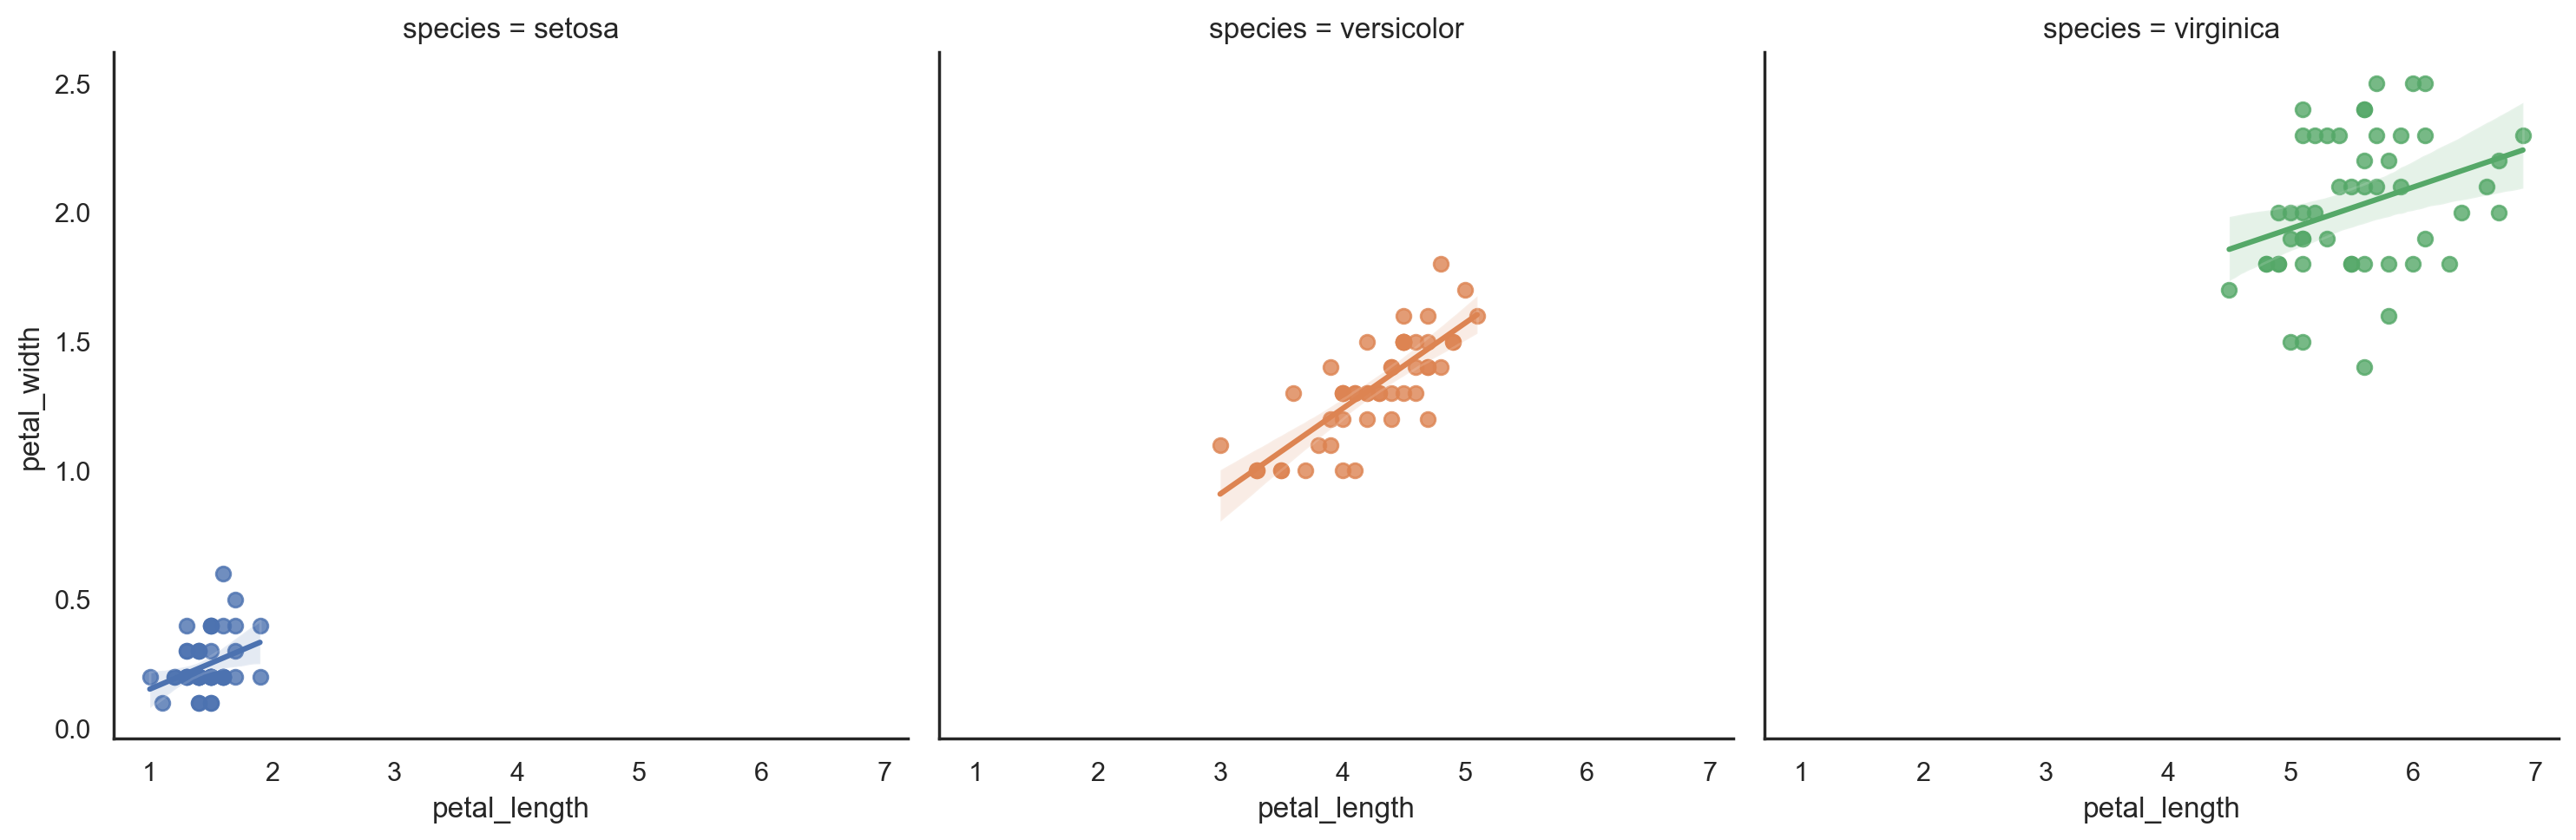

In [110]:
sns.lmplot(data=iris, x ='petal_length', y ='petal_width',hue='species',
          col = 'species')
g.fig.set_size_inches(10,3)
plt.show()

## 2.4 다중그래프를 위한 FacetGrid

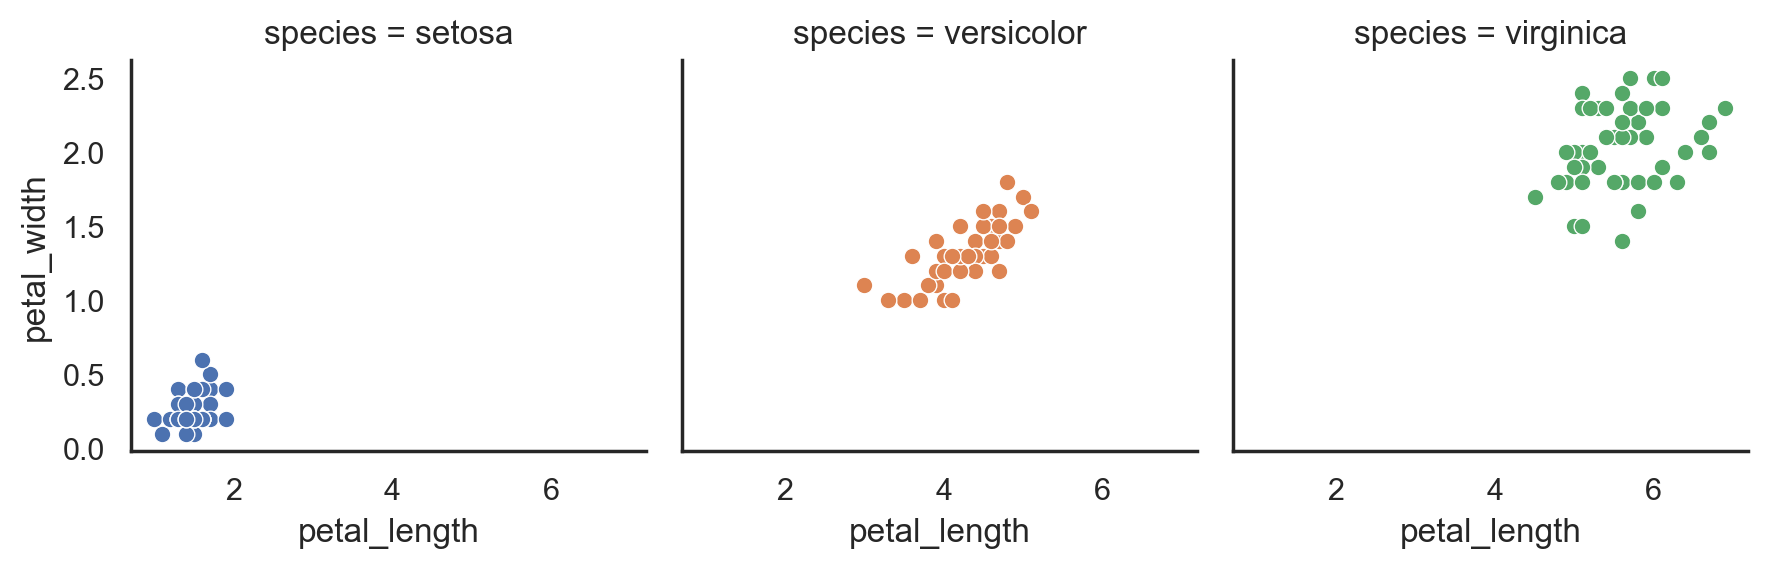

In [113]:
g = sns.FacetGrid(iris, col='species',hue ='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

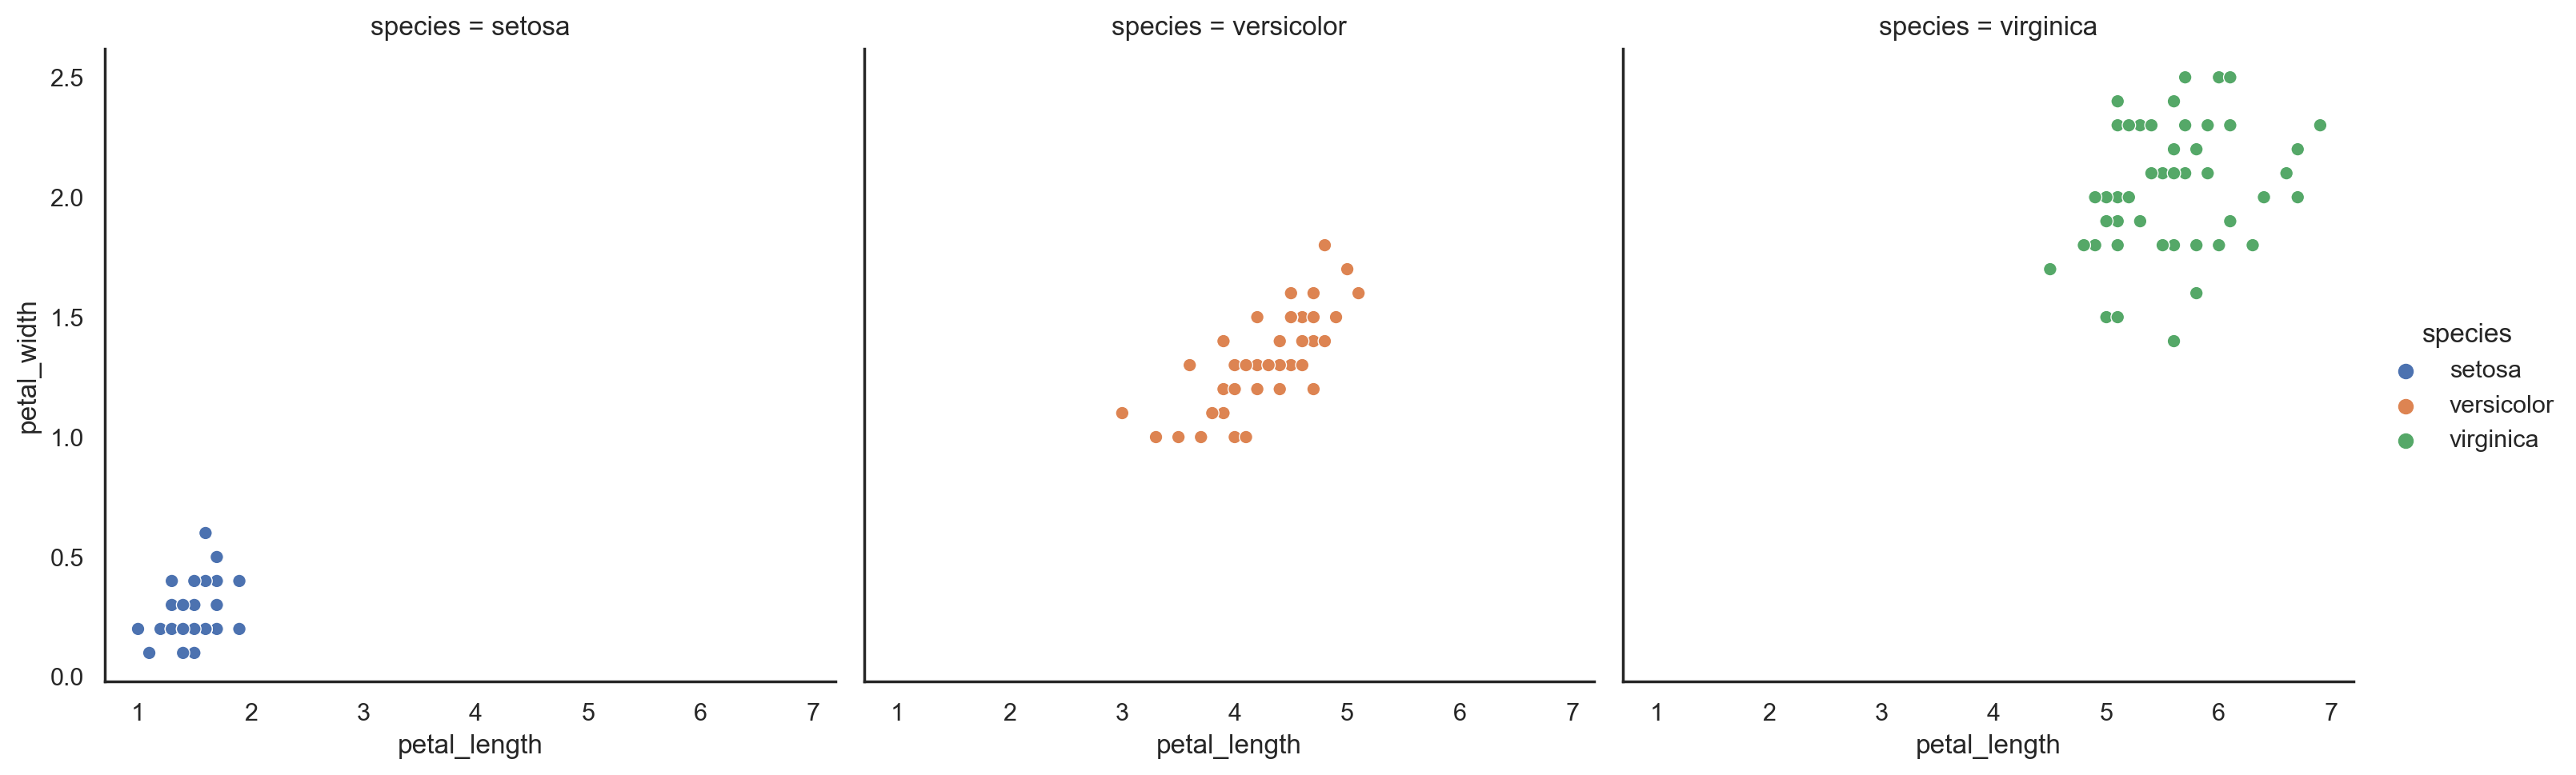

In [114]:
sns.relplot(iris, x='petal_length', y='petal_width', hue ='species', col='species')

g.fig.set_size_inches(10,3)
plt.show